In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_questions = pd.read_csv("/content/drive/MyDrive/Datasets/Questions.csv", encoding="ISO-8859-1")

In [ ]:
df_tags = pd.read_csv("/content/drive/MyDrive/Datasets/Tags.csv", encoding="ISO-8859-1")

In [ ]:
df_tags

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [ ]:
df_questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [ ]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


##EDA

####QUESTION DATASET EDA

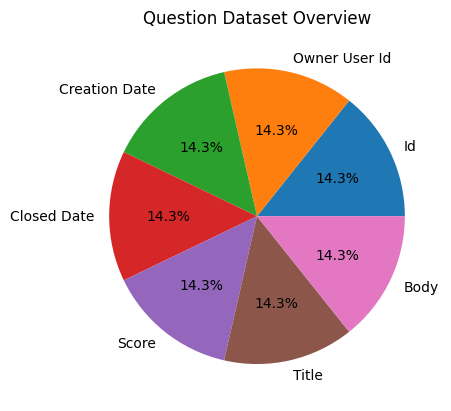

In [ ]:
# Data
labels = ['Id','Owner User Id','Creation Date','Closed Date','Score','Title','Body']
values = [len(df_questions['Id']), len(df_questions['OwnerUserId']),len(df_questions['CreationDate']),len(df_questions['ClosedDate']),len(df_questions['Score']),len(df_questions['Title']),len(df_questions['Body'])]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Question Dataset Overview')

# Display the pie chart
plt.show()

###TAG DATASET EDA

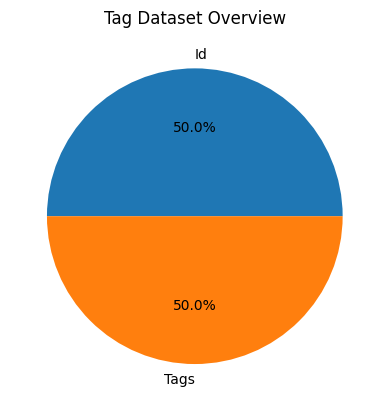

In [ ]:
# Data
labels = ['Id','Tags']
values = [len(df_tags['Id']), len(df_tags['Tag'])]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Tag Dataset Overview')

# Display the pie chart
plt.show()

In [ ]:
# Unique tag names
unique_tags=df_tags['Tag'].unique()
len(unique_tags)

37035

In [ ]:
# Count the number of unique values in a column
num_unique_values = df_tags['Tag'].nunique()
print(num_unique_values)

37034


In [ ]:
# Group tags by id and join them
df_tags['Tag'] = df_tags['Tag'].astype(str)
grouped_tags = df_tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

# Reset index for making simpler dataframe
grouped_tags.reset_index()
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final.head(5)

,Id,Tags
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction


In [ ]:
#merge both dataframe into one
df = df_questions.merge(grouped_tags_final, on='Id')
df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tags
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [ ]:
df.shape

(1264216, 8)

In [ ]:
#filter as per score
print(f"Maximum Score: {df['Score'].max()}")
print(f"Minimum Score: {df['Score'].min()}")

#get data above score 5
df=df[df['Score']>5]
df.shape

Maximum Score: 5190
Minimum Score: -73


(72950, 8)

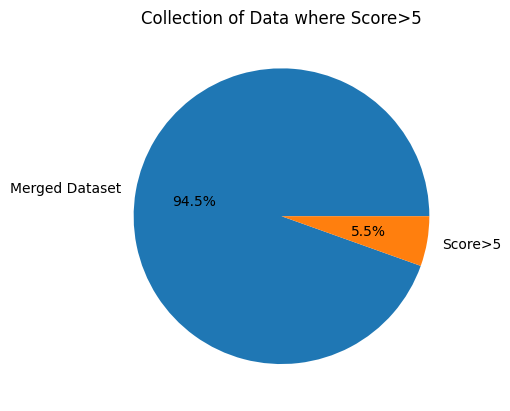

In [ ]:
# Data overview of Merged Dataset VS Dataset i.e Score>5
labels = ['Merged Dataset','Score>5']
values = [1264216, 72950]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Collection of Data where Score>5')

# Display the pie chart
plt.show()

In [ ]:
#Dropping unnecessary columns
df = df.drop(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate','Score'], axis=1)
display(df.head())

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [ ]:
#Dropping duplicate values
df = df.drop_duplicates()
df.shape

(72950, 3)

In [ ]:
from collections import Counter

# Split tags in order to get all tags
df['Tags'] = df['Tags'].apply(lambda x: x.split())
all_tags = [item for sublist in df['Tags'].values for item in sublist]
print(f'All Tags: {len(all_tags)}')

#get unique tags
unique_tags = list(set(all_tags))
print(f'Unique Tags: {len(unique_tags)}')

#get most frequent 100 tags
word_count = Counter(all_tags)

top_words = word_count.most_common(100)

top_hundred_tags= pd.DataFrame(top_words, columns=['Word', 'Count'])
top_hundred_tags.head()

All Tags: 224129
Unique Tags: 14883


,Word,Count
0,c#,6907
1,java,6862
2,javascript,5560
3,android,5052
4,python,4442


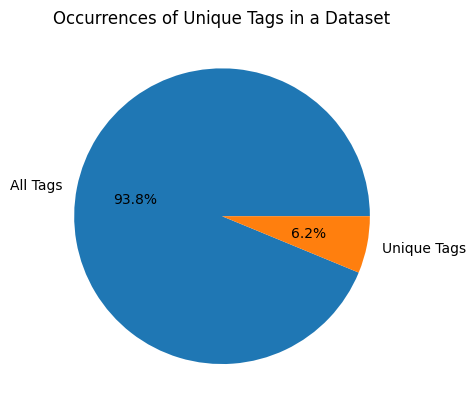

In [ ]:
#Finding out the Unique tags in All tags
# Data
labels = ['All Tags','Unique Tags']
values = [len(all_tags), len(unique_tags)]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Occurrences of Unique Tags in a Dataset')

# Display the pie chart
plt.show()

### **Word Cloud of Tags**

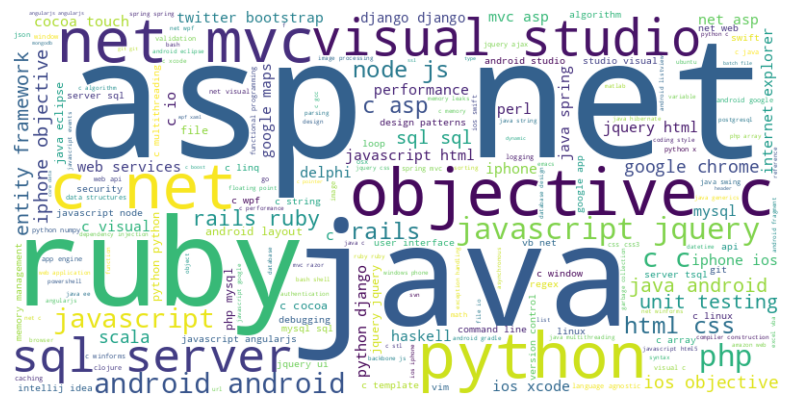

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tags))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#keeping most common tags containing row

tags_features=list(top_hundred_tags['Word'])

def most_common(tags):
    """Function to check if tag is in most common tag list"""
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

# Change Tags column into None for questions that don't have a most common tag
df['Tags'] = df['Tags'].apply(lambda x: most_common(x))
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

# Drop rows that contain None in Tags column
df.dropna(subset=['Tags'], inplace=True)
df.shape

(63167, 3)

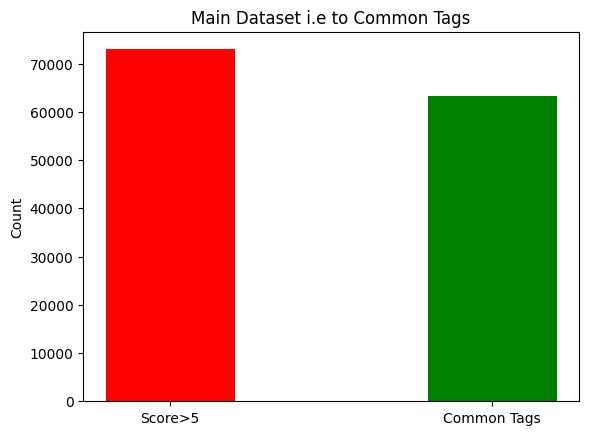

In [ ]:
#Bar plot for Main Dataset i.e Common Tags from Score>5
labels = ['Score>5', 'Common Tags']
values = [72950, 63167]

colors = ['red', 'green']  # Different colors for the bars

bar_width = 0.4  # Adjust the width of the bars

plt.bar(labels, values, color=colors, width=bar_width)

plt.title('Main Dataset i.e to Common Tags')
plt.ylabel('Count')

plt.show()

In [ ]:
df

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"
...,...,...,...
1262834,STL list very bad performance,"<p>It's supposed that ""push_back"" and ""pop_fro...","[c++, list]"
1262915,How to use a dict to subset a DataFrame?,"<p>Say, I have given a DataFrame with most of ...",[python]
1263065,Is there a way to use itertools in python to c...,<p>Let's say I have the following code:</p>\n\...,[python]
1263454,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,[c++]


##Preprocessing

In [ ]:
#html tag remover
from lxml import html

# Create a function to remove HTML tags from a single sentence
def remove_html_tags(sentence):
    tree = html.fromstring(sentence)
    return tree.text_content()

# Apply the function to the 'Body' column of  DataFrame
df['Body'] = df['Body'].apply(remove_html_tags)
df

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,[svn]
2,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...,"[sql, asp.net]"
3,Function for creating color wheels,This is something I've pseudo-solved many time...,[algorithm]
4,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,"[c#, .net]"
5,Should I use nested classes in this case?,I am working on a collection of classes used f...,"[c++, oop, class]"
...,...,...,...
1262834,STL list very bad performance,"It's supposed that ""push_back"" and ""pop_front""...","[c++, list]"
1262915,How to use a dict to subset a DataFrame?,"Say, I have given a DataFrame with most of the...",[python]
1263065,Is there a way to use itertools in python to c...,Let's say I have the following code:\n\na = [1...,[python]
1263454,Why does my result data returned as void* gets...,I am working in a project with a huge legacy c...,[c++]


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
# getting full forms
import contractions

def expand_contractions(text):
    return contractions.fix(text)

df['Body'] = df['Body'].apply(expand_contractions)

In [ ]:
import re

In [ ]:
#lowercase
df['Title'] = df['Title'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
df['Body'] = df['Body'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
df['Tags'] = df['Tags'].apply(lambda tag_list: [tag.lower() for tag in tag_list])
df

,Title,Body,Tags
1,good branching and merging tutorials for torto...,are there any really good tutorials explaining...,[svn]
2,aspnet site maps,has anyone got experience creating sqlbased as...,"[sql, asp.net]"
3,function for creating color wheels,this is something i have pseudosolved many tim...,[algorithm]
4,adding scripting functionality to net applicat...,i have a little game written in c it uses a da...,"[c#, .net]"
5,should i use nested classes in this case,i am working on a collection of classes used f...,"[c++, oop, class]"
...,...,...,...
1262834,stl list very bad performance,it is supposed that push_back and pop_front me...,"[c++, list]"
1262915,how to use a dict to subset a dataframe,say i have given a dataframe with most of the ...,[python]
1263065,is there a way to use itertools in python to c...,let us say i have the following code\n\na [12...,[python]
1263454,why does my result data returned as void gets ...,i am working in a project with a huge legacy c...,[c++]


In [ ]:
#Punctuation
import string

# Define a function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Body'] = df['Body'].apply(remove_punctuation)
df['Title'] = df['Title'].apply(remove_punctuation)
df

,Title,Body,Tags
1,good branching and merging tutorials for torto...,are there any really good tutorials explaining...,[svn]
2,aspnet site maps,has anyone got experience creating sqlbased as...,"[sql, asp.net]"
3,function for creating color wheels,this is something i have pseudosolved many tim...,[algorithm]
4,adding scripting functionality to net applicat...,i have a little game written in c it uses a da...,"[c#, .net]"
5,should i use nested classes in this case,i am working on a collection of classes used f...,"[c++, oop, class]"
...,...,...,...
1262834,stl list very bad performance,it is supposed that pushback and popfront meth...,"[c++, list]"
1262915,how to use a dict to subset a dataframe,say i have given a dataframe with most of the ...,[python]
1263065,is there a way to use itertools in python to c...,let us say i have the following code\n\na 123...,[python]
1263454,why does my result data returned as void gets ...,i am working in a project with a huge legacy c...,[c++]


### **Lematization**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lematize_text(text):
    words = word_tokenize(text)
    lemmatize_list=[]

    for w in words:
      x=lemmatizer.lemmatize(w, pos="v")
      lemmatize_list.append(x)
    return ' '.join(map(str, lemmatize_list))

#apply on Title
df['Title']=df['Title'].apply(lambda sentence : lematize_text(sentence))

#apply on Body
df['Body']=df['Body'].apply(lambda sentence : lematize_text(sentence))

**Stopword Removal and Tokenization**

In [ ]:
from nltk.corpus import stopwords
#Remove stopwords
stop=stopwords.words("english")

In [ ]:
#After removing stopwords
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop]))
df['Body'] = df['Body'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop]))
df

,Title,Body,Tags
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn]
2,aspnet site map,anyone get experience create sqlbased aspnet s...,"[sql, asp.net]"
3,function create color wheel,something pseudosolved many time never quite f...,[algorithm]
4,add script functionality net applications,little game write c use database backend trade...,"[c#, .net]"
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]"
...,...,...,...
1262834,stl list bad performance,suppose pushback popfront methods stl list imp...,"[c++, list]"
1262915,use dict subset dataframe,say give dataframe columns categorical data da...,[python]
1263065,way use itertools python clean nest iterations,let us say follow code 123 b 246 c 357 j b k c...,[python]
1263454,result data return void get break,work project huge legacy code base try redesig...,[c++]


### **Data Augmentation**

In [ ]:
df['Tags'].value_counts()

[android]                   3782
[java]                      3242
[python]                    2593
[c#]                        2306
[c++]                       1890
                            ... 
[c#, algorithm, string]        1
[datetime, r]                  1
[mysql, unit-testing]          1
[linux, osx, bash]             1
[c#, linq, unit-testing]       1
Name: Tags, Length: 4748, dtype: int64

In [ ]:
#filter tags that apprease only once

# Count occurrences of values in the 'tags' column
tag_counts = df['Tags'].value_counts()

# Get tags that occur only once
tags_occurred_once = tag_counts[tag_counts == 1].index

# Filter rows based on the tags that occurred only once
filtered_df = df[df['Tags'].isin(tags_occurred_once)]

filtered_df.reset_index(drop=True, inplace=True)

filtered_df

,Title,Body,Tags
0,aspnet site map,anyone get experience create sqlbased aspnet s...,"[sql, asp.net]"
1,set unit test visual studio c,trouble figure get test framework set usable v...,"[c++, visual-studio, unit-testing]"
2,check string content string length vs empty st...,efficient compiler best practice check whether...,"[string, optimization]"
3,unit test codegenerator,difficult openended question know think would ...,"[c++, python, unit-testing]"
4,speed aspnet web site application,ajaxnet enable aspnet 20 web site host site da...,"[asp.net, ajax, optimization, performance]"
...,...,...,...
2695,reduce number query jpql pojo contain entity,entity relation transactionmanytoone eager def...,"[postgresql, hibernate]"
2696,resize webview height base html content window...,currently work windows 10 uwp app face issue w...,"[javascript, c#]"
2697,add voiceover accessibility apps icon badge nu...,question add custom voiceover accessibility la...,"[ios, swift, optimization]"
2698,add another timer already run loop,give follow program include iostream include u...,"[c++, linux, c++11]"


In [ ]:
#augment the sample which apprears only once
import random

def get_synonyms(word):
    synonyms = []
    for syn in nltk.corpus.wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms


def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words]))
    random.shuffle(random_word_list)
    for _ in range(n):
        random_word = random_word_list.pop()
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
    return new_words

def augment_text(text, augmentation_factor=2):
    augmented_texts = [text]
    words = word_tokenize(text)
    num_augmentations = min(augmentation_factor, len(words))
    for _ in range(num_augmentations):
        augmented_words = synonym_replacement(words, n=1)
        augmented_texts.append(" ".join(augmented_words))
    return augmented_texts

# Apply data augmentation to "body" and "title" columns
augmented_data = []

augmentation_factor = 2

for _, row in filtered_df.iterrows():
    original_body = row["Body"]
    augmented_bodies = augment_text(original_body, augmentation_factor)

    original_title = row["Title"]
    augmented_titles = augment_text(original_title, augmentation_factor)

    for body, title in zip(augmented_bodies, augmented_titles):
        augmented_data.append({"Body": body, "Title": title, "Tags": row["Tags"]})

augmented_df = pd.DataFrame(augmented_data)


augmented_df

,Body,Title,Tags
0,anyone get experience create sqlbased aspnet s...,aspnet site map,"[sql, asp.net]"
1,anyone get experience create sqlbased aspnet s...,aspnet site map,"[sql, asp.net]"
2,anyone get experience create sqlbased aspnet s...,aspnet site map,"[sql, asp.net]"
3,trouble figure get test framework set usable v...,set unit test visual studio c,"[c++, visual-studio, unit-testing]"
4,trouble figure get test framework set usable v...,set social_unit test visual studio c,"[c++, visual-studio, unit-testing]"
...,...,...,...
8092,give follow program include iostream include u...,add another timer already run loop,"[c++, linux, c++11]"
8093,give follow program include iostream include u...,add another timer already run loop,"[c++, linux, c++11]"
8094,test method manipulate collection give set par...,use single assert bad practice,"[c#, linq, unit-testing]"
8095,test method manipulate collection give set par...,use single assert defective practice,"[c#, linq, unit-testing]"


In [ ]:
#concate orignal dataframe and augmented dataframe
concatenated_df = pd.concat([df, augmented_df], ignore_index=True)
concatenated_df.shape

(71264, 3)

In [ ]:
df=concatenated_df
df.shape

(71264, 3)

### **Apply Multi-label Binarizer on Target**

In [ ]:
df['Tags'].shape

(71264,)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()

multilabel_binarizer.fit_transform(df['Tags'])
y_bin= multilabel_binarizer.transform(df['Tags'])
y_bin.shape


(71264, 100)

In [ ]:
multilabel_binarizer.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'angularjs', 'api',
       'arrays', 'asp.net', 'asp.net-mvc', 'asp.net-mvc-3', 'bash', 'c',
       'c#', 'c++', 'c++11', 'class', 'cocoa', 'cocoa-touch', 'css',
       'css3', 'database', 'datetime', 'debugging', 'delphi',
       'design-patterns', 'django', 'eclipse', 'emacs',
       'entity-framework', 'exception', 'facebook', 'function', 'gcc',
       'generics', 'git', 'github', 'google-chrome', 'haskell',
       'hibernate', 'html', 'html5', 'http', 'image', 'ios', 'ipad',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'linq', 'linux',
       'list', 'math', 'maven', 'mongodb', 'multithreading', 'mysql',
       'node.js', 'numpy', 'objective-c', 'oop', 'optimization', 'oracle',
       'osx', 'performance', 'perl', 'php', 'postgresql', 'python', 'qt',
       'r', 'regex', 'rest', 'ruby', 'ruby-on-rails', 'ruby-on-rails-3',
       'scala', 'security', 'shell', 'spring', 'sql', 'sql-server',
       'string', 'svn', 'swift', 's

In [ ]:
labels_df=pd.DataFrame(y_bin, columns=multilabel_binarizer.classes_)
labels_df

,.net,ajax,algorithm,android,angularjs,api,arrays,asp.net,asp.net-mvc,asp.net-mvc-3,...,unit-testing,vim,visual-studio,visual-studio-2010,wcf,windows,winforms,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71261,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
71262,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### **Apply TF-IDF on Features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

text=df['Body']+' '+df['Title']
x_tfidf = vectorizer.fit_transform(text)

x_tfidf

<71264x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2875823 stored elements in Compressed Sparse Row format>

### **Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y_bin, test_size = 0.3, random_state = 42, stratify=y_bin)

print(f'Shape of train:- features- {x_train.shape}, targets- {y_train.shape}')
print(f'Shape of test:- features- {x_test.shape}, targets- {y_test.shape}')

Shape of train:- features- (49884, 5000), targets- (49884, 100)
Shape of test:- features- (21380, 5000), targets- (21380, 100)


### **Evaluate performance**

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

model_name=[]
precision_score=[]
recall_score=[]
f1=[]
accuracy=[]
hamming_score=[]
jaccard_scr=[]

def display_score(y_true, y_pred):
  with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)

    class_report = classification_report(y_true, y_pred)

  patterns = {
    "micro avg": r"micro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)",
    "macro avg": r"macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)",
    "weighted avg": r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)",
    "samples avg": r"samples avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)"
  }

  data = []
  for label, pattern in patterns.items():
      matches = re.findall(pattern, class_report)
      if matches:
          precision, recall, f1_score, support = matches[0]
          data.append([label, float(precision), float(recall), float(f1_score), int(support)])

  # Create a pandas DataFrame
  columns = ["Metric", "Precision", "Recall", "F1-Score", "Support"]
  report_df = pd.DataFrame(data, columns=columns)

  precision_score.append(report_df.loc[2,'Precision'])
  recall_score.append(report_df.loc[2,'Recall'])
  f1.append(report_df.loc[2,'F1-Score'])

  #hamming loss calculation
  hamming = hamming_loss(y_true, y_pred)
  print("Hamming Loss: {:.2f}%".format(hamming * 100))
  hamming_score.append(hamming)

  #jaccard calculation
  jaccard = jaccard_score(y_true, y_pred, average='micro')
  print("Jaccard Score: {:.2f}%".format(jaccard * 100))
  jaccard_scr.append(jaccard)

  #accuracy
  acc = accuracy_score(y_true, y_pred)
  print("Accuracy: {:.2f}%".format(acc * 100))
  accuracy.append(acc)

  #classification report print
  print('\n')
  print(report_df)

### **Logistic Regression**

In [ ]:
#Get best Hyperparameter
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#hyperparameter
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['liblinear', 'saga']
}

classifier = GridSearchCV(MultiOutputClassifier(LogisticRegression(max_iter=1000)), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

#Train the multi-label classifier
classifier.fit(x_train, y_train)

best_model = classifier.best_estimator_

print(best_model)

In [ ]:
#execute using best hyperparameter
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

classifier = MultiOutputClassifier(LogisticRegression(max_iter=1000, C=10))

#Train the multi-label classifier
classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred_bin = classifier.predict(x_test)

#evaluation metrices
print('Classifier: Logistic Regression')
model_name.append('Logistic Regression')
display_score(y_test, y_pred_bin)

Classifier: Logistic Regression
Hamming Loss: 0.90%
Jaccard Score: 54.08%
Accuracy: 40.08%


         Metric  Precision  Recall  F1-Score  Support
0     micro avg       0.83    0.61      0.70    37144
1     macro avg       0.83    0.60      0.70    37144
2  weighted avg       0.82    0.61      0.70    37144
3   samples avg       0.66    0.61      0.61    37144


### **Random Forest**

In [ ]:
#Get best Hyperparameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create a base Random Forest classifier
base_classifier = RandomForestClassifier()

# Wrap the base classifier with MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(base_classifier)

# Define hyperparameters and their possible values
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_features': ['sqrt', 'log2', 0.5],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

# Create a grid search object with cross-validation
classifier = GridSearchCV(estimator=multi_output_classifier, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to your data
classifier.fit(x_train, y_train)

# Get the best hyperparameters and their corresponding score
best_params = classifier.best_params_
best_score = classifier.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100,
                                       max_features='sqrt',
                                       class_weight='balanced',
                                       bootstrap=True,
                                       random_state=42))

#Train the multi-label classifier
classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred_bin = classifier.predict(x_test)

#evaluation metrices
print('Classifier: Random Forest')
model_name.append('Random Forest')
display_score(y_test, y_pred_bin)

Classifier: Logistic Regression
Hamming Loss: 1.02%
Jaccard Score: 43.12%
Accuracy: 32.36%


         Metric  Precision  Recall  F1-Score  Support
0     micro avg       0.93    0.44      0.60    37144
1     macro avg       0.97    0.39      0.55    37144
2  weighted avg       0.94    0.44      0.59    37144
3   samples avg       0.48    0.41      0.43    37144


### **SGD Classifier**

In [ ]:
#Get the best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, f1_score

# Define hyperparameters and their possible values for grid search
param_grid = {
    'estimator__loss': ['hinge', 'log_loss', 'modified_huber'],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1]
}

scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
}

classifier = GridSearchCV(MultiOutputClassifier(SGDClassifier()), param_grid=param_grid, cv=5, scoring=scoring, refit='f1_micro')
classifier.fit(x_train, y_train)

# Get the best hyperparameters and their corresponding score
best_params = classifier.best_params_
best_score = classifier.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

#---OUTPUT-----
#Best Hyperparameters: {'estimator__alpha': 0.0001, 'estimator__loss': 'modified_huber', 'estimator__penalty': 'l2'}
#Best Score: 0.6249325314617942

In [ ]:
#execute using best hyperparameter
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier with appropriate settings
sgd_classifier = SGDClassifier(alpha=0.0001, penalty='l2', loss='modified_huber')

# Create a MultiOutputClassifier with the SGDClassifier
classifier = MultiOutputClassifier(sgd_classifier)

#Train the multi-label classifier
classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred_bin = classifier.predict(x_test)

#evaluation metrices
print('Classifier: SGDClassifier')
model_name.append('SGD Classifier')
display_score(y_test, y_pred_bin)

Classifier: SGDClassifier
Hamming Loss: 1.00%
Jaccard Score: 46.99%
Accuracy: 33.71%


         Metric  Precision  Recall  F1-Score  Support
0     micro avg       0.86    0.51      0.64    37144
1     macro avg       0.86    0.48      0.60    37144
2  weighted avg       0.85    0.51      0.62    37144
3   samples avg       0.64    0.54      0.56    37144


### **Multinomial Naive Bayes**

In [ ]:
#Get the best hyperparameters
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.multioutput import MultiOutputClassifier


# Define parameter grid for grid search
param_grid = {
    'estimator__alpha': [0.01, 0.1, 1.0],
    'estimator__fit_prior': [True, False]
}

scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
}

# Perform grid search using cross-validation
classifier = GridSearchCV(MultiOutputClassifier(MultinomialNB()), param_grid=param_grid, cv=5, scoring=scoring, refit='f1_micro')
classifier.fit(x_train, y_train)

# Get the best hyperparameters and their corresponding score
best_params = classifier.best_params_
best_score = classifier.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

#---OUTPUT-----
#Best Hyperparameters: {'estimator__alpha': 0.01, 'estimator__fit_prior': True}
#Best Score: 0.4317815466097743

In [ ]:
#execute using best hyperparameter
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB(alpha= 0.01, fit_prior=True)

classifier = MultiOutputClassifier(nb_classifier)

#Train the multi-label classifier
classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred_bin = classifier.predict(x_test)

#evaluation metrices
print('Classifier: Multinomial Naive Bayes')
model_name.append('Multinomial NB')
display_score(y_test, y_pred_bin)

Classifier: Multinomial Naive Bayes
Hamming Loss: 1.36%
Jaccard Score: 29.53%
Accuracy: 17.45%


         Metric  Precision  Recall  F1-Score  Support
0     micro avg       0.75    0.33      0.46    37144
1     macro avg       0.79    0.31      0.43    37144
2  weighted avg       0.77    0.33      0.44    37144
3   samples avg       0.39    0.33      0.34    37144


### **SVM**

In [ ]:
#Get the best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer, f1_score

# Define hyperparameters and their possible values for grid search
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto']
}

scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
}

# Perform grid search
classifier = GridSearchCV(MultiOutputClassifier(SVC()), param_grid=param_grid, cv=5, scoring=scoring, refit='f1_micro')
classifier.fit(x_train, y_train)

# Get the best hyperparameters and their corresponding score
best_params = classifier.best_params_
best_score = classifier.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

In [ ]:
#execute using best hyperparameter
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')

classifier = MultiOutputClassifier(svm_classifier)

#Train the multi-label classifier
classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred_bin = classifier.predict(x_test)

#evaluation metrices
print('Classifier: SVM')
display_score(y_test, y_pred_bin)

### **Result Analysis**

In [ ]:
model_name

['Logistic Regression', 'SGD Classifier', 'Multinomial NB', 'Random Forest']

In [ ]:
#create dataFrame for result
result_data={
    "Model" : model_name,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score":f1,
    "Hamming Loss":hamming_score,
    "Jaccard Index": jaccard_scr
}

result_df=pd.DataFrame(result_data)

result_df.set_index("Model", inplace=True)

result_df

,Precision,Recall,F1 Score,Hamming Loss,Jaccard Index
Model,,,,,
Logistic Regression,0.82,0.61,0.70,0.008994,0.540778
SGD Classifier,0.85,0.51,0.62,0.009983,0.469937
Multinomial NB,0.77,0.33,0.44,0.013570,0.295254
Random Forest,0.94,0.44,0.59,0.010195,0.431166


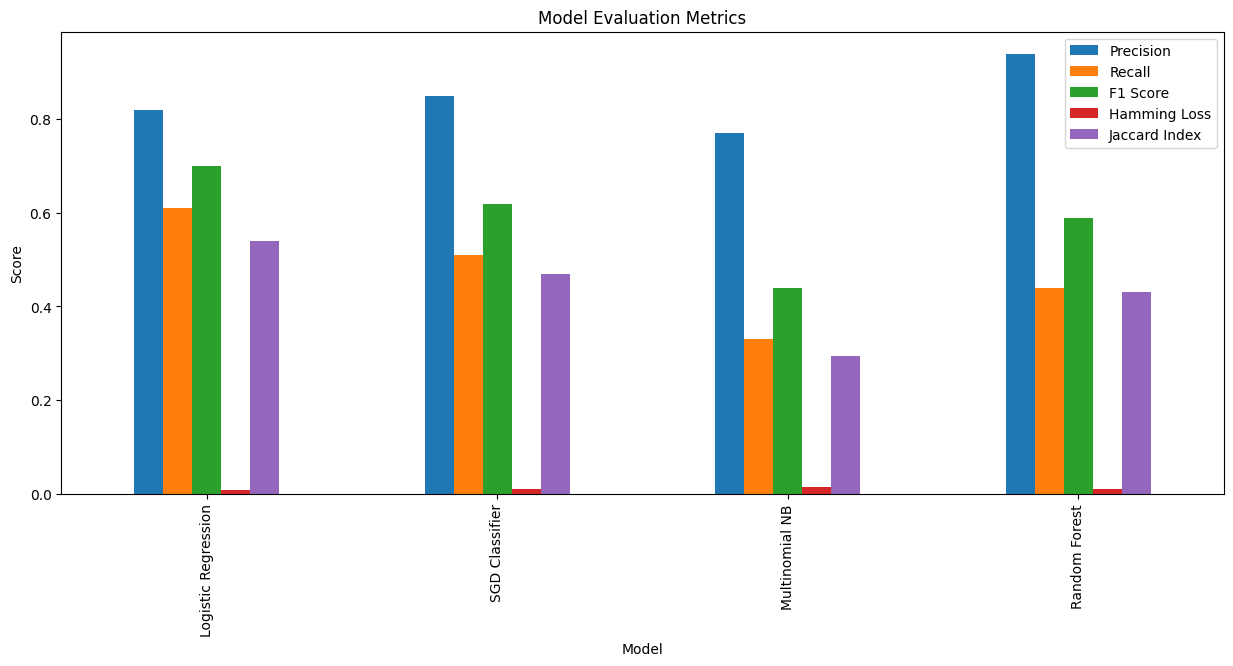

In [ ]:
result_df.plot(kind="bar", figsize=(15, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.show()